色彩空间

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import transforms

色彩空间类型转换是指，将图像从一个色彩空间转换到另外一个色彩空间.

**GRAY**（灰度图像）通常指8位灰度图，其具有256个灰度级，像素值的范围是`[0,255]`。

从 RGB 色彩空间到 GRAY 色彩空间的标准转换公式为
```
Gray=0.299·R+0.587·G+0.114·B
```

**XYZ** 色彩空间是由CIE（International Commission on Illumination）定义的，是一种更便于计算的色彩空间，它可以与RGB色彩空间相互转换。

![RGB 到 XYZ](https://res.weread.qq.com/wrepub/epub_26297910_125)
![XYZ 到 RGB](https://res.weread.qq.com/wrepub/epub_26297910_126)

在 **YCrCb** 色彩空间中，Y代表光源的亮度，色度信息保存在Cr和Cb中，其中，Cr表示红色分量信息，Cb表示蓝色分量信息。

```
Y=0.299·R+0.587·G+0.114·B
Cr=（R-Y）×0.713+delta
Cb=（B-Y）×0.564+delta
```

![delta](https://res.weread.qq.com/wrepub/epub_26297910_127)

```
R=Y+1.403·（Cr-delta）
G=Y-0.714·（Cr-delta）-0.344·（Cb-delta）
B=Y+1.773·（Cb-delta）
```

**HSV** 色彩空间从心理学和视觉的角度出发，指出人眼的色彩知觉主要包含三要素：色调（Hue，也称为色相）、饱和度（Saturation）、亮度（Value），色调指光的颜色，饱和度是指色彩的深浅程度，亮度指人眼感受到的光的明暗程度.
在具体实现上，我们将物理空间的颜色分布在圆周上，不同的角度代表不同的颜色.
色调的取值范围是 `[0, 360]`, 饱和度的取值范围是 `[0, 1]`, 亮度的取值范围是 `[0, 1]`.

**HLS** 色彩空间包含的三要素是色调H（Hue）、光亮度/明度L（Lightness）、饱和度S（Saturation）。

`CIEL*a*b*` 色彩空间是均匀色彩空间模型，它是面向视觉感知的颜色模型。从视觉感知均匀的角度来讲，人所感知到的两种颜色的区别程度，应该与这两种颜色在色彩空间中的距离成正比。在某个色彩空间中，如果人所观察到的两种颜色的区别程度，与这两种颜色在该色彩空间中对应的点之间的欧式距离成正比，则称该色彩空间为均匀色彩空间。

`CIEL*u*v*` 色彩空间与设备无关，适用于显示器显示和根据加色原理进行组合的场合，该模型中比较强调对红色的表示，即对红色的变化比较敏感，但对蓝色的变化不太敏感。

**Bayer** 色彩空间（Bayer模型）被广泛地应用在CCD和CMOS相机中


In [2]:
filename = 'D:\code\pytorch_learn\data\mao.jpg'

In [3]:
# 进行色彩空间转换
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

[cvtColor 文档](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor)

In [11]:
img = np.random.randint(0, 256, size=[4, 4], dtype=np.uint8)
mask = cv2.inRange(img, 100, 200)
print(img)
print(mask)
mask = np.where(mask > 0, False, True)
img[mask] = 0
print(img)

[[ 78  78 102 105]
 [255 227  68  29]
 [145 206 141  39]
 [ 65  57  20  36]]
[[  0   0 255 255]
 [  0   0   0   0]
 [255   0 255   0]
 [  0   0   0   0]]
[[  0   0 102 105]
 [  0   0   0   0]
 [145   0 141   0]
 [  0   0   0   0]]


(-0.5, 899.5, 899.5, -0.5)

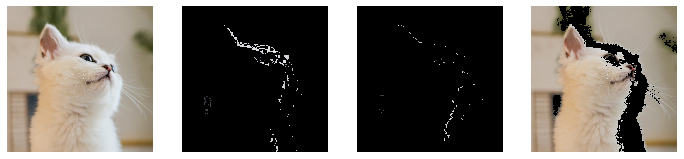

In [35]:
fig_size = plt.gcf().get_size_inches()  # 获取当前 figure 尺寸
plt.gcf().set_size_inches(fig_size * 2)   # 放大为两倍

# 显示特定的颜色值

img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.subplot(1, 4, 1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_HSV2RGB)); plt.axis('off')

minBlue = np.array([110, 0, 0])
maxBlue = np.array([130, 255, 255])
mask = cv2.inRange(img, minBlue, maxBlue)
blue = cv2.bitwise_and(img, img, mask=mask)
blue = cv2.cvtColor(blue, cv2.COLOR_HSV2RGB)
plt.subplot(1, 4, 2); plt.imshow(blue); plt.axis('off')

minGreen = np.array([50, 0, 0])
maxGreen = np.array([70, 255, 255])
mask = cv2.inRange(img, minGreen, maxGreen)
green = cv2.bitwise_and(img, img, mask=mask)
green = cv2.cvtColor(green, cv2.COLOR_HSV2RGB)
plt.subplot(1, 4, 3); plt.imshow(green); plt.axis('off')

minRed = np.array([0, 0, 0])
maxRed = np.array([30, 255, 255])
mask = cv2.inRange(img, minRed, maxRed)
red = cv2.bitwise_and(img, img, mask=mask)
red = cv2.cvtColor(red, cv2.COLOR_HSV2RGB)
plt.subplot(1, 4, 4); plt.imshow(red); plt.axis('off')


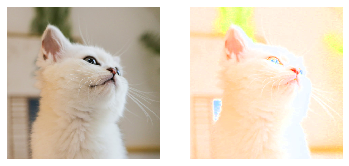

In [58]:
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.subplot(1, 2, 1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_HSV2RGB)); plt.axis('off')

img[..., 2] = 255  # 亮度提到最高

plt.subplot(1, 2, 2); plt.imshow(cv2.cvtColor(img, cv2.COLOR_HSV2RGB)); plt.axis('off')

plt.show()

在RGB色彩空间三个通道的基础上，还可以加上一个A通道，也叫alpha通道，表示透明度。这种4个通道的色彩空间被称为RGBA色彩空间，PNG图像是一种典型的4通道图像。alpha通道的赋值范围是`[0, 1]`，或者`[0, 255]`，表示从透明到不透明。

(900, 900, 4)


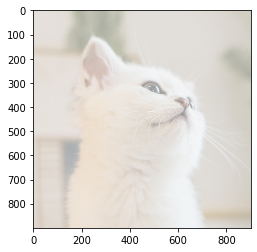

In [73]:
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
print(img.shape)
img[..., 3] = 100
plt.imshow(img)